<a href="https://colab.research.google.com/github/versant2612/jnotebooks/blob/main/tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from unicodedata import normalize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:


# Sample corpus
documents = [
"Maria Celina Bodin de Moraes (Doutorado em direito civil, Università di Camerino, 1986) é Professora Titular de Direito Civil da Faculdade de \
Direito da Universidade do Estado do Rio de Janeiro (UERJ) e Professora Associada do Departamento de Direito da Pontifícia Universidade Católica do \
Rio de Janeiro (PUC-Rio). É ábitra e parecerista em Direito Privado e Editora-chefe da Civilistica.com - Revista Eletrônica de direito civil \
(Qualis A2). Foi diretora do Departamento de Direito da PUC-Rio e coordenadora da área do Direito da Faperj. Atua na área do direito privado, \
principalmente mediante a metodologia do direito civil constitucional. Os temas mais frequentes de sua produção científica são: princípios \
constitucionais da dignidade da pessoa humana e da solidariedade, aplicação direta da Constituição às relações privadas, proteção das pessoas \
vulneráveis, direitos da personalidade, relações familiares, contratos e responsabilidade civil."            
,
"Possui graduação em Engenharia Mecânica pela Pontifícia Universidade Católica do Rio de Janeiro (1982), mestrado em Engenharia de Produção - \
Departamento de Engenharia Industrial (1996) e doutorado em Engenharia de Produção pela Pontifícia Universidade Católica do Rio de Janeiro (2005). \
O mestrado e doutorado foram ambos na área de Finanças e Análise de Investimentos. Foi Consultor Master da Controladoria - Petróleo Brasileiro - \
Rio de Janeiro - Matriz, onde trabalhou de 01/02/1983 até 05/12/2016. É Professor Adjunto do Departamento de Engenharia Elétrica - PUC-Rio, sendo \
pesquisador do Grupo de Sistemas de Apoio à Decisão - Laboratório de Inteligência Computacional Aplicada. É autor de dois livros texto (pós-graduação) \
de opções reais. É Corporate Advisor do Real Options Group. Ministrou cursos de opções reais na Petrobras de 1996 a 2016, além de cursos de teoria \
dos jogos e valor da informação até 2016. Lá ministrou outros cursos como de análise de risco em projetos, finanças corporativas e project finance. \
Na PUC-Rio ministra curso de opções reais desde 2005 e de jogos de opções reais desde 2006. Coordenou vários projetos de pesquisa entre a Petrobras \
e universidades (principalmente PUC-Rio, mas também FGV e Mines Paris Tech). Já foi orador principal em várias conferências internacionais. Já deu \
seminários de opções reais em instituições internacionais (como o MIT em 2002 e 2003) e entidades nacionais (como a Unicamp em 1998, UFRJ em 2003 e \
a Alliance e Fundação Dom Cabral em 2005). Criou o primeiro website dedicado a opções reais (na PUC em 1995). Desenvolveu várias aplicações \
(inclusive software) de opções reais na Petrobras, onde também implantou padrões de análise de risco, de análise de investimento em informação e \
outros. Tem experiência na área de Engenharia de Produção, com ênfase em Avaliação Econômica de Projetos, atuando principalmente nos seguintes temas: \
opções reais, análise de investimentos sob incertezas, jogos de opções reais, teoria dos jogos, exploração e produção de petróleo, valor da informação, \
análise de risco em projetos, análise de investimento em energia renovável, custo de capital de projetos e financiamento corporativo."
,
"Doutora em Serviço Social (UERJ-2015). Mestre em Serviço Social (UFRJ -2010). Graduada em Serviço Social (UFRJ -1999). Possui experiência em \
diversas áreas do trabalho profissional do Serviço Social ( Empresa, AssistÊncia Social, Saúde, consultoria/assessoria). É docente e pesquisadora da \
Pontifícia Universidade Católica do Rio de Janeiro nos cursos de graduação e pós-graduação em Serviço Social, trabalhou em empresas multinacionais \
(Farmacêutica - GlaxoSmithKline e Telefonia celular- Claro), ONG (Obra Social do Rio de Janeiro), no setor público atuou na Prefeitura do Rio de \
Janeiro na condição de concursada. Autora do Livro Serviço Social e Consultoria Empresarial (2020), organizadora de coletâneas sobre trabalho, \
Serviço Social e Direitos Humanos."
,
"Engenheiro Mecânico formado pela Universidade Federal do Rio de Janeiro (1980), MSc em Engenharia Mecânica pela Pontifícia Universidade Católica \
do Rio de Janeiro (1988) e PhD em Engenharia Mecânica - Tecnologia de Aerossóis pela University of Minnesota (1994), USA. Professor Associado do \
Departamento de Engenharia Mecânica da Pontifícia Universidade Católica do Rio de Janeiro, onde coordena o grupo de pesquisas multidisciplinar de \
Engenharia Ambiental - Poluição Atmosférica atuando nos seguintes temas: tecnologia de aerossóis e instrumentação, processos atmosféricos, \
biocombustíveis, controle da poluição (poluentes locais e gases de efeito estufa), captura e armazenamento geológico de carbono, desenvolvimento de \
sensores ambientais, e geração de energia através de resíduos sólidos urbanos (Waste to Energy, WTE). Engenheiro de Petróleo pela Petrobras (CEPET 81), \
onde atuou entre 1981-1985. Membro do IPCC - Intergovernmental Panel on Climate Change (entre 2004-2017), grupo de cientistas que recebeu o Prêmio Nobel\
 da Paz em 2007."
,
"Flávia de Almeida Viveiros de Castro é Juíza de Direito e Professora Convidada da EMERJ (Escola da Magistratura do Estado do Rio de Janeiro) ESAJ \
(Escola de Administração Judiciária do Tribunal de Justiça do Estado do Rio de Janeiro) e Fundação Getúlio Vargas - RJ; Possui Pós-Doutorado em \
Direitos Humanos pelo Instituto JUS GENTIUM da Faculdade de Direito de Coimbra (2017/18). É doutora em Direito o Civil-Constitucional pela Universidade \
de Direito do Estado do Rio de Janeiro(2006). Mestre em Direito pela Pontifícia Universidade Católica do Rio de Janeiro (1999); Mestre em Ciência \
Política (Ciência Política e Sociologia) pela Pontifícia Universidade Católica do Rio de Janeiro (1990); Possui curso de Especialização em direito \
português pelo Centro de Estudos Judiciários de Portugal (1997) e Especialização em Ciência Política, pelo Instituto Metodista Bennett (1985); Graduada \
em Direito e em Comunicação Social, especialidade Jornalismo pela Pontifícia Universidade Católica do Rio de Janeiro (1980 e 1990). É Juíza Titular da \
6ª Vara Cível Regional da Barra da Tijuca, tendo exercido a magistratura em varas de falência, fazenda pública, criminal, tribunal do júri, orfãos e \
sucessões e família. Já assumiu a função de Juíza Eleitoral na 175 Zona Eleitoral. Já exerceu a mesma função em Marechal Hermes, Bangu e Pavuna. Foi \
Juíza Corregedora - Auxiliar da Corregedora de Justiça em (1996);Exerce a docência como palestrante e professora convidada nas áreas de Direito Civil \
e Direito Tributário. Foi coordenadora acadêmica do Instituto de direito da Pontifícia Universidade Católica do Rio de Janeiro e coordenadora acadêmica \
dos cursos de pós-graduação em direito imobiliário, direito fiscal, direito empresarial, direito processual civil e direito da saúde do Instituto de \
Direito da PUC-RJ."
,
"Vitor Nascimento Aguiar graduou-se em Engenharia Civil com ênfase em Mecânica dos Solos na Universidade Federal do Rio de Janeiro (UFRJ) em 2006. \
Concluiu o mestrado e o doutorado em Engenharia Civil (Geotecnia) pela COPPE/UFRJ em 2008 e 2014. Em suas pesquisas de mestrado e doutorado, investigou \
efeitos de tempo e de velocidade de deformação no adensamento e na resistência ao cisalhamento de argilas moles saturadas. Atuou por dez anos em \
projetos e consultorias de obras de infraestrutura na Mecasolo Engenharia e Consultoria. Realizou estágio de pós-doutorado no Norwegian Geotechnical \
Institute (NGI) de 2017 a 2018. Atualmente é professor do quadro principal do Departamento de Engenharia Civil e Ambiental da Pontifícia Universidade \
Católica do Rio de Janeiro (PUC-Rio), onde leciona a disciplina de Laboratório de Geotecnia na graduação e as disciplinas de Ensaios de Laboratório e \
Geotecnia Experimental na pós-graduação. Tem exercido o cargo de secretário executivo na Associação Brasileira de Mecânica dos Solos - Núcleo RJ."
]



In [3]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [4]:
documents_df=pd.DataFrame(documents,columns=['documents'])

### Corpus Dataframe

In [5]:
documents_df

,documents
0,"Maria Celina Bodin de Moraes (Doutorado em direito civil, Università di Camerino, 1986) é Professora Titular de Direito Civil da Faculdade de Direito da Universidade do Estado do Rio de Janeiro (UERJ) e Professora Associada do Departamento de Direito da Pontifícia Universidade Católica do Rio de Janeiro (PUC-Rio). É ábitra e parecerista em Direito Privado e Editora-chefe da Civilistica.com - Revista Eletrônica de direito civil (Qualis A2). Foi diretora do Departamento de Direito da PUC-Rio e coordenadora da área do Direito da Faperj. Atua na área do direito privado, principalmente mediante a metodologia do direito civil constitucional. Os temas mais frequentes de sua produção científica são: princípios constitucionais da dignidade da pessoa humana e da solidariedade, aplicação direta da Constituição às relações privadas, proteção das pessoas vulneráveis, direitos da personalidade, relações familiares, contratos e responsabilidade civil."
1,"Possui graduação em Engenharia Mecânica pela Pontifícia Universidade Católica do Rio de Janeiro (1982), mestrado em Engenharia de Produção - Departamento de Engenharia Industrial (1996) e doutorado em Engenharia de Produção pela Pontifícia Universidade Católica do Rio de Janeiro (2005). O mestrado e doutorado foram ambos na área de Finanças e Análise de Investimentos. Foi Consultor Master da Controladoria - Petróleo Brasileiro - Rio de Janeiro - Matriz, onde trabalhou de 01/02/1983 até 05/12/2016. É Professor Adjunto do Departamento de Engenharia Elétrica - PUC-Rio, sendo pesquisador do Grupo de Sistemas de Apoio à Decisão - Laboratório de Inteligência Computacional Aplicada. É autor de dois livros texto (pós-graduação) de opções reais. É Corporate Advisor do Real Options Group. Ministrou cursos de opções reais na Petrobras de 1996 a 2016, além de cursos de teoria dos jogos e valor da informação até 2016. Lá ministrou outros cursos como de análise de risco em projetos, finanças corporativas e project finance. Na PUC-Rio ministra curso de opções reais desde 2005 e de jogos de opções reais desde 2006. Coordenou vários projetos de pesquisa entre a Petrobras e universidades (principalmente PUC-Rio, mas também FGV e Mines Paris Tech). Já foi orador principal em várias conferências internacionais. Já deu seminários de opções reais em instituições internacionais (como o MIT em 2002 e 2003) e entidades nacionais (como a Unicamp em 1998, UFRJ em 2003 e a Alliance e Fundação Dom Cabral em 2005). Criou o primeiro website dedicado a opções reais (na PUC em 1995). Desenvolveu várias aplicações (inclusive software) de opções reais na Petrobras, onde também implantou padrões de análise de risco, de análise de investimento em informação e outros. Tem experiência na área de Engenharia de Produção, com ênfase em Avaliação Econômica de Projetos, atuando principalmente nos seguintes temas: opções reais, análise de investimentos sob incertezas, jogos de opções reais, teoria dos jogos, exploração e produção de petróleo, valor da informação, análise de risco em projetos, análise de investimento em energia renovável, custo de capital de projetos e financiamento corporativo."
2,"Doutora em Serviço Social (UERJ-2015). Mestre em Serviço Social (UFRJ -2010). Graduada em Serviço Social (UFRJ -1999). Possui experiência em diversas áreas do trabalho profissional do Serviço Social ( Empresa, AssistÊncia Social, Saúde, consultoria/assessoria). É docente e pesquisadora da Pontifícia Universidade Católica do Rio de Janeiro nos cursos de graduação e pós-graduação em Serviço Social, trabalhou em empresas multinacionais (Farmacêutica - GlaxoSmithKline e Telefonia celular- Claro), ONG (Obra Social do Rio de Janeiro), no setor público atuou na Prefeitura do Rio de Janeiro na condição de concursada. Autora do Livro Serviço Social e Consultoria Empresarial (2020), organizadora de coletâneas sobre trabalho, Serviço Social e Direitos Humanos."
3,"Engenheiro Mecânico formado pela Universidade Federal do Rio de Janeiro (1

In [6]:
N=documents_df.shape[0]

### Some preprocessing of text
We will have to perform some text cleansing and pre-processing such as droping accents, removing special characters, removing stop words and lemmatizing words (using WordNet) in the corpus before further steps.



In [7]:
documents_df['documents']=documents_df['documents'].apply(lambda x: " ".join(normalize('NFD', x).encode('ascii', 'ignore').decode("utf-8") for x in x.split() ))
documents_df['documents'] = documents_df['documents'].apply(lambda x: " ".join(re.sub('[^a-zA-Z \n]', ' ', x).lower() for x in x.split()))
stop = stopwords.words('portuguese')
documents_df['documents'] = documents_df['documents'].apply(lambda x: " ".join(Word(x).lemmatize() for x in x.split() if x not in stop))

### Documents post preprocessing

In [8]:
documents_df

,documents
0,maria celina bodin moraes doutorado direito civil universita di camerino professora titular direito civil faculdade direito universidade estado rio janeiro uerj professora associada departamento direito pontificia universidade catolica rio janeiro puc rio abitra parecerista direito privado editora chefe civilistica revista eletronica direito civil qualis diretora departamento direito puc rio coordenadora area direito faperj atua area direito privado principalmente mediante metodologia direito civil constitucional temas frequentes producao cientifica sao principios constitucionais dignidade pessoa humana solidariedade aplicacao direta constituicao relacoes privadas protecao pessoas vulneraveis direitos personalidade relacoes familiares contratos responsabilidade civil
1,possui graduacao engenharia mecanica pontificia universidade catolica rio janeiro mestrado engenharia producao departamento engenharia industrial doutorado engenharia producao pontificia universidade catolica rio janeiro mestrado doutorado ambo area financas analise investimentos consultor master controladoria petroleo brasileiro rio janeiro matriz onde trabalhou ate professor adjunto departamento engenharia eletrica puc rio sendo pesquisador grupo sistemas apoio decisao laboratorio inteligencia computacional aplicada autor doi livros texto po graduacao opcoes reais corporate advisor real option group ministrou cursos opcoes reais petrobras alem cursos teoria jogos valor informacao ate la ministrou outros cursos analise risco projetos financas corporativas project finance puc rio ministra curso opcoes reais desde jogos opcoes reais desde coordenou varios projetos pesquisa petrobras universidades principalmente puc rio tambem fgv mine paris tech ja orador principal varias conferencias internacionais ja deu seminarios opcoes reais instituicoes internacionais mit entidades nacionais unicamp ufrj alliance fundacao dom cabral criou primeiro website dedicado opcoes reais puc desenvolveu varias aplicacoes inclusive software opcoes reais petrobras onde tambem implantou padroes analise risco analise investimento informacao outros experiencia area engenharia producao enfase avaliacao economica projetos atuando principalmente seguintes temas opcoes reais analise investimentos sob incertezas jogos opcoes reais teoria jogos exploracao producao petroleo valor informacao analise risco projetos analise investimento energia renovavel custo capital projetos financiamento corporativo
2,doutora servico social uerj mestre servico social ufrj graduada servico social ufrj possui experiencia diversas area trabalho profissional servico social empresa assistencia social saude consultoria assessoria docente pesquisadora pontificia universidade catolica rio janeiro cursos graduacao po graduacao servico social trabalhou empresas multinacionais farmaceutica glaxosmithkline telefonia celular claro ong obra social rio janeiro setor publico atuou prefeitura rio janeiro condicao concursada autora livro servico social consultoria empresarial organizadora coletaneas sobre trabalho servico social direitos humanos
3,engenheiro mecanico formado universidade federal rio janeiro msc engenharia mecanica pontificia universidade catolica rio janeiro phd engenharia mecanica tecnologia aerossois university of minnesota usa professor associado departamento engenharia mecanica pontificia universidade catolica rio janeiro onde coordena grupo pesquisas multidisciplinar engenharia ambiental poluicao atmosferica atuando seguintes temas tecnologia aerossois instrumentacao processos atmosfericos biocombustiveis controle poluicao poluentes locais gas efeito estufa captura armazenamento geologico carbono desenvolvimento sensores ambientais geracao energia atraves residuos solidos urbanos waste to energy wte engenheiro petroleo petrobras cepet onde atuou membro ipcc intergovernmental panel on climate change grupo cientistas recebeu premio nobel paz
4,flavia almeida viveiros castro juiza direito professora

CountVectorizer is provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.


In [9]:
count_vectorizer=CountVectorizer()

In [10]:
count_vectors=count_vectorizer.fit_transform(documents_df['documents'])

In [11]:
count_vectors.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 2, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])

### tf-Term Frequency vectors

In [12]:
pd.DataFrame(count_vectors.toarray(),columns=[count_vectorizer.get_feature_names()])

,abitra,academica,adensamento,adjunto,administracao,advisor,aerossois,aguiar,alem,alliance,almeida,ambientais,ambiental,ambo,analise,ano,aplicacao,aplicacoes,aplicada,apoio,area,argilas,armazenamento,assessoria,assistencia,associacao,associada,associado,assumiu,ate,atmosferica,atmosfericos,atraves,atua,atualmente,atuando,atuou,autor,autora,auxiliar,...,solo,sucessoes,tambem,tech,tecnologia,telefonia,temas,tempo,tendo,teoria,texto,tijuca,titular,to,trabalho,trabalhou,tribunal,tributario,uerj,ufrj,unicamp,universidade,universidades,universita,university,urbanos,usa,valor,vara,vargas,varias,varios,velocidade,vitor,viveiros,vulneraveis,waste,website,wte,zona
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,7,0,0,1,1,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,...,0,0,2,1,0,0,1,0,0,2,1,0,0,0,0,1,0,0,0,1,1,2,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,2,1,0,0,0,5,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [13]:
# calculating document frequencies from term frequencies
document_frequencies=np.sum(np.where(count_vectors.toarray()>=1,1,0),axis=0)

In [14]:
document_frequencies

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 4, 1, 1, 1, 6, 1, 1, 3, 1, 1, 1, 2, 2, 1,

### idf-Inverse document frequencies

In tf there is no notion of importance. idf, inverse document frequency, is used to introduce the importance factor of any term. This is required because some of the terms would have little or no discriminating power such as the collection of documents about machine learning would have term machine in almost all the documents and does not hold much discriminating relevance.

Document frequency, which is the number of documents in the corpus that contains the term t, is used to scale the weight(factor of importance) of term t. 
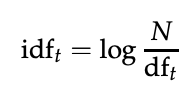

In [15]:
pd.DataFrame((np.log(N/document_frequencies)).reshape(1,-1),columns=[count_vectorizer.get_feature_names()])

,abitra,academica,adensamento,adjunto,administracao,advisor,aerossois,aguiar,alem,alliance,almeida,ambientais,ambiental,ambo,analise,ano,aplicacao,aplicacoes,aplicada,apoio,area,argilas,armazenamento,assessoria,assistencia,associacao,associada,associado,assumiu,ate,atmosferica,atmosfericos,atraves,atua,atualmente,atuando,atuou,autor,autora,auxiliar,...,solo,sucessoes,tambem,tech,tecnologia,telefonia,temas,tempo,tendo,teoria,texto,tijuca,titular,to,trabalho,trabalhou,tribunal,tributario,uerj,ufrj,unicamp,universidade,universidades,universita,university,urbanos,usa,valor,vara,vargas,varias,varios,velocidade,vitor,viveiros,vulneraveis,waste,website,wte,zona
0,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.098612,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,0.405465,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.098612,0.693147,1.791759,1.791759,1.791759,...,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,0.693147,1.791759,1.791759,1.791759,1.791759,1.791759,1.098612,1.791759,1.791759,1.098612,1.791759,1.791759,1.098612,0.693147,1.791759,0.0,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759


### tf-idf vectors

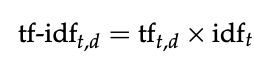

In [16]:
pd.DataFrame(count_vectors.toarray()*(np.log(N/document_frequencies)),columns=[count_vectorizer.get_feature_names()])

,abitra,academica,adensamento,adjunto,administracao,advisor,aerossois,aguiar,alem,alliance,almeida,ambientais,ambiental,ambo,analise,ano,aplicacao,aplicacoes,aplicada,apoio,area,argilas,armazenamento,assessoria,assistencia,associacao,associada,associado,assumiu,ate,atmosferica,atmosfericos,atraves,atua,atualmente,atuando,atuou,autor,autora,auxiliar,...,solo,sucessoes,tambem,tech,tecnologia,telefonia,temas,tempo,tendo,teoria,texto,tijuca,titular,to,trabalho,trabalhou,tribunal,tributario,uerj,ufrj,unicamp,universidade,universidades,universita,university,urbanos,usa,valor,vara,vargas,varias,varios,velocidade,vitor,viveiros,vulneraveis,waste,website,wte,zona
0,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.810930,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.0,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.791759,0.000000,1.791759,0.000000,0.000000,1.791759,1.791759,0.000000,0.000000,0.000000,1.791759,12.542316,0.000000,0.000000,1.791759,1.791759,1.791759,0.810930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.583519,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,1.791759,0.000000,0.000000,...,0.000000,0.000000,3.583519,1.791759,0.000000,0.000000,0.693147,0.000000,0.000000,3.583519,1.791759,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.693147,1.791759,0.0,1.791759,0.000000,0.000000,0.000000,0.000000,3.583519,0.000000,0.000000,3.583519,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405465,0.000000,0.000000,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,1.791759,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.583519,1.098612,0.000000,0.000000,1.098612,1.386294,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.583519,0.000000,0.000000,0.000000,0.000000,1.791759,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,1.791759,1.791759,1.791759,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.583519,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.791759,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,1.791759,0.000000
4,0.000000,3.583519,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,...,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000

In [27]:
tfidfvectoriser=TfidfVectorizer(max_features=256)
tfidfvectoriser.fit(documents_df['documents'])
tfidf_vectors=tfidfvectoriser.transform(documents_df['documents'])

It is not always true that multiple occurrences of a term in a document mean more significance of that term in proportion to the number of occurrences. Sublinear tf-scaling is modification of term frequency, which calculates weight as following,
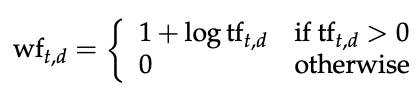

In this case tf-idf becomes,
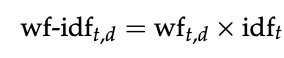


In [17]:
# Sub linear tf scaling
count_vectors_inf=np.where(count_vectors.toarray()==0,float('inf'),count_vectors.toarray())
count_vectors_sublinear=np.where(np.log(count_vectors_inf)==float('inf'),0,1+np.log(count_vectors_inf))

### wf-idf

In [18]:
pd.DataFrame(count_vectors_sublinear*np.log(N/document_frequencies),columns=[count_vectorizer.get_feature_names()])

,abitra,academica,adensamento,adjunto,administracao,advisor,aerossois,aguiar,alem,alliance,almeida,ambientais,ambiental,ambo,analise,ano,aplicacao,aplicacoes,aplicada,apoio,area,argilas,armazenamento,assessoria,assistencia,associacao,associada,associado,assumiu,ate,atmosferica,atmosfericos,atraves,atua,atualmente,atuando,atuou,autor,autora,auxiliar,...,solo,sucessoes,tambem,tech,tecnologia,telefonia,temas,tempo,tendo,teoria,texto,tijuca,titular,to,trabalho,trabalhou,tribunal,tributario,uerj,ufrj,unicamp,universidade,universidades,universita,university,urbanos,usa,valor,vara,vargas,varias,varios,velocidade,vitor,viveiros,vulneraveis,waste,website,wte,zona
0,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.686512,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.0,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.791759,0.000000,1.791759,0.000000,0.000000,1.791759,1.791759,0.000000,0.000000,0.000000,1.791759,5.278362,0.000000,0.000000,1.791759,1.791759,1.791759,0.686512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.033712,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,1.791759,0.000000,0.000000,...,0.000000,0.000000,3.033712,1.791759,0.000000,0.000000,0.693147,0.000000,0.000000,3.033712,1.791759,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.693147,1.791759,0.0,1.791759,0.000000,0.000000,0.000000,0.000000,3.033712,0.000000,0.000000,3.033712,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405465,0.000000,0.000000,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,1.791759,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.033712,1.098612,0.000000,0.000000,1.098612,1.173600,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.033712,0.000000,0.000000,0.000000,0.000000,1.791759,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,1.791759,1.791759,1.791759,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.033712,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.791759,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,1.791759,0.000000
4,0.000000,3.033712,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,...,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.0000

This is another modification of term frequency where tf of every term occurring in a document is normalized by the maximum tf in that document.

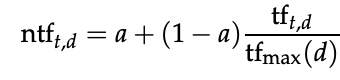

In [19]:
# Maximum tf normalization
a=0.4
count_vectors_maxnormalized=a+(1-a)*count_vectors.toarray()/np.max(count_vectors.toarray(),axis=1).reshape(-1,1)

### ntf-idf

In [20]:
pd.DataFrame(count_vectors_maxnormalized*np.log(N/document_frequencies),columns=[count_vectorizer.get_feature_names()])

,abitra,academica,adensamento,adjunto,administracao,advisor,aerossois,aguiar,alem,alliance,almeida,ambientais,ambiental,ambo,analise,ano,aplicacao,aplicacoes,aplicada,apoio,area,argilas,armazenamento,assessoria,assistencia,associacao,associada,associado,assumiu,ate,atmosferica,atmosfericos,atraves,atua,atualmente,atuando,atuou,autor,autora,auxiliar,...,solo,sucessoes,tambem,tech,tecnologia,telefonia,temas,tempo,tendo,teoria,texto,tijuca,titular,to,trabalho,trabalhou,tribunal,tributario,uerj,ufrj,unicamp,universidade,universidades,universita,university,urbanos,usa,valor,vara,vargas,varias,varios,velocidade,vitor,viveiros,vulneraveis,waste,website,wte,zona
0,0.824209,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.439445,0.716704,0.716704,0.716704,0.824209,0.716704,0.716704,0.716704,0.210842,0.716704,0.716704,0.716704,0.716704,0.716704,0.824209,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.824209,0.716704,0.439445,0.277259,0.716704,0.716704,0.716704,...,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.318848,0.716704,0.716704,0.716704,0.716704,0.716704,0.505362,0.716704,0.716704,0.439445,0.716704,0.716704,0.505362,0.277259,0.716704,0.0,0.716704,0.824209,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.824209,0.716704,0.716704,0.716704,0.716704
1,0.716704,0.716704,0.716704,0.836154,0.716704,0.836154,0.716704,0.716704,0.836154,0.836154,0.716704,0.716704,0.439445,0.836154,1.552858,0.716704,0.716704,0.836154,0.836154,0.836154,0.216248,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.955605,0.716704,0.716704,0.716704,0.716704,0.716704,0.512686,0.277259,0.836154,0.716704,0.716704,...,0.716704,0.716704,0.955605,0.836154,0.716704,0.716704,0.323469,0.716704,0.716704,0.955605,0.836154,0.716704,0.439445,0.716704,0.716704,0.512686,0.716704,0.716704,0.439445,0.323469,0.836154,0.0,0.836154,0.716704,0.716704,0.716704,0.716704,0.955605,0.716704,0.716704,0.955605,0.836154,0.716704,0.716704,0.716704,0.716704,0.716704,0.836154,0.716704,0.716704
2,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.439445,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.189217,0.716704,0.716704,0.836154,0.836154,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.439445,0.323469,0.716704,0.836154,0.716704,...,0.716704,0.716704,0.716704,0.716704,0.716704,0.836154,0.277259,0.716704,0.716704,0.716704,0.716704,0.716704,0.439445,0.716704,0.955605,0.512686,0.716704,0.716704,0.512686,0.369678,0.716704,0.0,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704
3,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,1.254232,0.716704,0.716704,0.716704,0.716704,0.985468,0.604237,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.162186,0.716704,0.985468,0.716704,0.716704,0.716704,0.716704,0.985468,0.716704,0.716704,0.985468,0.985468,0.985468,0.716704,0.716704,0.604237,0.381231,0.716704,0.716704,0.716704,...,0.716704,0.716704,0.716704,0.716704,1.254232,0.716704,0.381231,0.716704,0.716704,0.716704,0.716704,0.716704,0.439445,0.985468,0.716704,0.439445,0.716704,0.716704,0.439445,0.277259,0.716704,0.0,0.716704,0.716704,0.985468,0.985468,0.985468,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.985468,0.716704,0.985468,0.716704
4,0.716704,0.851086,0.716704,0.716704,0.783895,0.716704,0.716704,0.716704,0.716704,0.716704,0.783895,0.716704,0.439445,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.177391,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.783895,0.716704,0.716704,0.716704,0.716704,0.716704,0.716704,0.439445,0.277259,0.716704,0.716704,0.783895,...,0.716704,0.783895,0.716704,0.716704,0.716704,0.716704,0.277259,0.716704,0.783895,0.7167

Normalization,

We can normalize documents vectors either by L2 or L1 norm. After L2 normalization, sum of elements of every document vector will be 1. In this case cosine similarity between any two document vectors is just the dot product of the vectors. In case of L1 normalization, sum of absolute values of elements of very document vector becomes 1.

In [31]:
np.linalg.norm(tfidf_vectors.toarray()[0],ord=2)

1.0000000000000002